In [1]:
from tensorflow.keras.layers import Embedding

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

import matplotlib.pyplot as plt
import time

In [2]:
start = time.time()
embedding_layer = Embedding(1000, 64)

In [3]:
max_feature = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_feature)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [4]:
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


2022-06-28 23:33:02.585943: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 23:33:02.586217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 23:33:03.017236: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-28 23:33:03.017539: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/10


2022-06-28 23:33:03.277912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


623/625 [============================>.] - ETA: 0s - loss: 0.6709 - acc: 0.6202

2022-06-28 23:33:17.643340: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 16s 24ms/step - loss: 0.6706 - acc: 0.6207 - val_loss: 0.6224 - val_acc: 0.6924
Epoch 2/10
625/625 [==============================] - 15s 24ms/step - loss: 0.5433 - acc: 0.7500 - val_loss: 0.5278 - val_acc: 0.7332
Epoch 3/10
625/625 [==============================] - 15s 24ms/step - loss: 0.4609 - acc: 0.7868 - val_loss: 0.5008 - val_acc: 0.7456
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 0.4213 - acc: 0.8076 - val_loss: 0.4959 - val_acc: 0.7532
Epoch 5/10
625/625 [==============================] - 13s 21ms/step - loss: 0.3946 - acc: 0.8231 - val_loss: 0.4961 - val_acc: 0.7552
Epoch 6/10
625/625 [==============================] - 14s 23ms/step - loss: 0.3726 - acc: 0.8361 - val_loss: 0.4993 - val_acc: 0.7542
Epoch 7/10
625/625 [==============================] - 14s 23ms/step - loss: 0.3531 - acc: 0.8474 - val_loss: 0.5056 - val_acc: 0.7542
Epoch 8/10
625/625 [==============================] - 18s 29ms/step - los

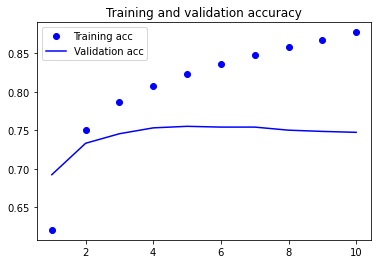

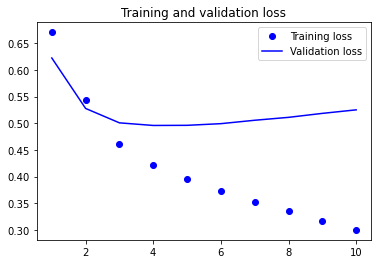

elapsed time: 157.55378890037537


In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

print(f"elapsed time: {time.time() - start}")